<a href="https://colab.research.google.com/github/syhamham/AWA-Project/blob/main/wind2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 풍량 - 실증존

In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
df = pd.read_excel('data.xlsx')
df.head()

ds            y
0 2023-09-25 09:55:00  8558.333333
1 2023-09-25 09:56:00  8580.666667
2 2023-09-25 09:57:00  8515.333333
3 2023-09-25 09:58:00  8527.000000
4 2023-09-25 09:59:00  8475.666667

In [3]:
df.tail()

ds       y
38735 2023-10-23 11:38:00  8430.5
38736 2023-10-23 11:39:00  8585.0
38737 2023-10-23 11:40:00  8557.5
38738 2023-10-23 11:41:00  8467.0
38739 2023-10-23 11:42:00  8600.5

In [4]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp63ak9q9r/5tp2wexn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp63ak9q9r/v_f7qbwf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22391', 'data', 'file=/tmp/tmp63ak9q9r/5tp2wexn.json', 'init=/tmp/tmp63ak9q9r/v_f7qbwf.json', 'output', 'file=/tmp/tmp63ak9q9r/prophet_modelljq7i5gq/prophet_model-20240514071638.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [5]:
future = m.make_future_dataframe(periods=60, freq='1min')
future.tail(60)

ds
38740 2023-10-23 11:43:00
38741 2023-10-23 11:44:00
38742 2023-10-23 11:45:00
38743 2023-10-23 11:46:00
38744 2023-10-23 11:47:00
38745 2023-10-23 11:48:00
38746 2023-10-23 11:49:00
38747 2023-10-23 11:50:00
38748 2023-10-23 11:51:00
38749 2023-10-23 11:52:00
38750 2023-10-23 11:53:00
38751 2023-10-23 11:54:00
38752 2023-10-23 11:55:00
38753 2023-10-23 11:56:00
38754 2023-10-23 11:57:00
38755 2023-10-23 11:58:00
38756 2023-10-23 11:59:00
38757 2023-10-23 12:00:00
38758 2023-10-23 12:01:00
38759 2023-10-23 12:02:00
38760 2023-10-23 12:03:00
38761 2023-10-23 12:04:00
38762 2023-10-23 12:05:00
38763 2023-10-23 12:06:00
38764 2023-10-23 12:07:00
38765 2023-10-23 12:08:00
38766 2023-10-23 12:09:00
38767 2023-10-23 12:10:00
38768 2023-10-23 12:11:00
38769 2023-10-23 12:12:00
38770 2023-10-23 12:13:00
38771 2023-10-23 12:14:00
38772 2023-10-23 12:15:00
38773 2023-10-23 12:16:00
38774 2023-10-23 12:17:00
38775 2023-10-23 12:18:00
38776 2023-10-23 12:19:00
38777 2023-10-23 12:20:00
38778 2023-10-23 12:21:00
38779 2023-10-23 12:22:00
38780 2023-10-23 12:23:00
38781 2023-10-23 12:24:00
38782 2023-10-23 12:25:00
38783 2023-10-23 12:26:00
38784 2023-10-23 12:27:00
38785 2023-10-23 12:28:00
38786 2023-10-23 12:29:00
38787 2023-10-23 12:30:00
38788 2023-10-23 12:31:00
38789 2023-10-23 12:32:00
38790 2023-10-23 12:33:00
38791 2023-10-23 12:34:00
38792 2023-10-23 12:35:00
38793 2023-10-23 12:36:00
38794 2023-10-23 12:37:00
38795 2023-10-23 12:38:00
38796 2023-10-23 12:39:00
38797 2023-10-23 12:40:00
38798 2023-10-23 12:41:00
38799 2023-10-23 12:42:00

In [6]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
38795 2023-10-23 12:38:00  8392.326567  8299.232312  8478.210225
38796 2023-10-23 12:39:00  8392.260104  8304.367610  8487.291806
38797 2023-10-23 12:40:00  8392.193460  8296.147411  8482.181127
38798 2023-10-23 12:41:00  8392.126651  8299.614458  8487.599313
38799 2023-10-23 12:42:00  8392.059691  8295.010043  8480.036066

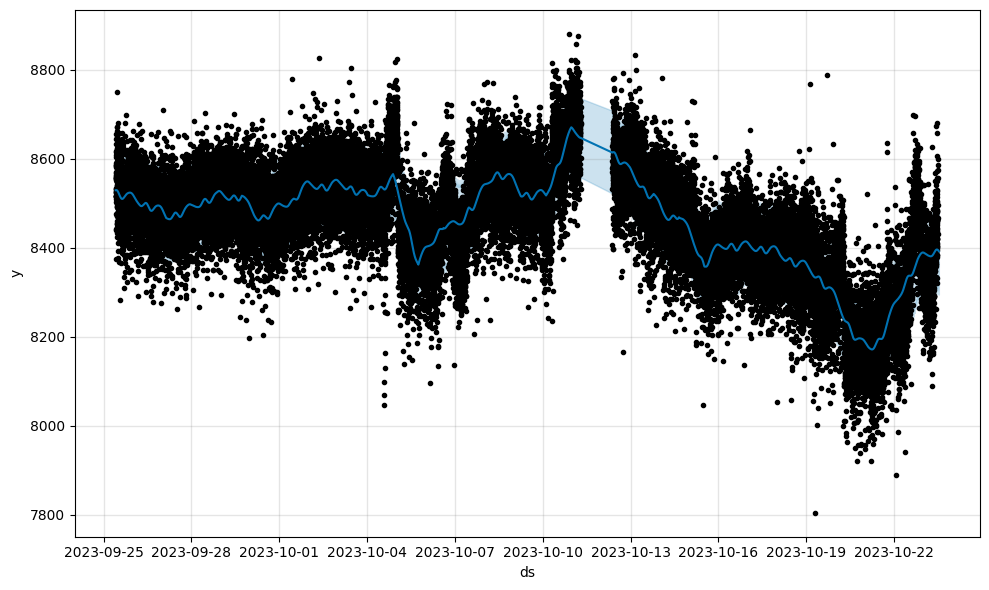

In [7]:
fig1 = m.plot(forecast)
fig1.show()

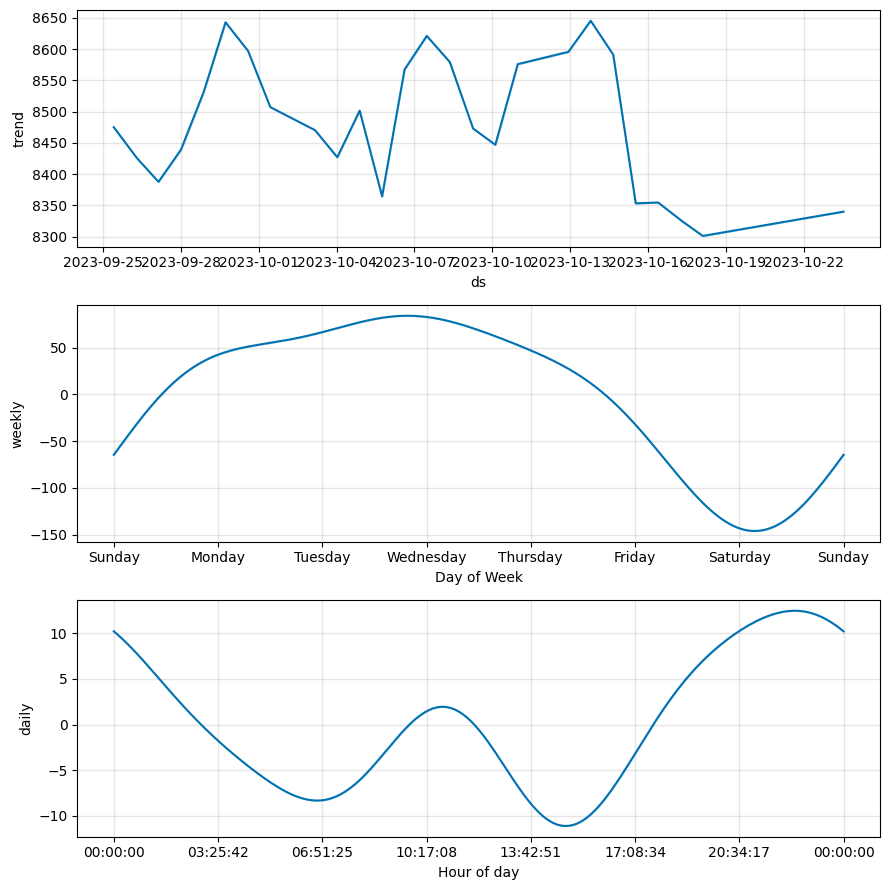

In [8]:
fig2 = m.plot_components(forecast)
fig2.show()

In [9]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [10]:
plot_components_plotly(m, forecast)